#### First list column names for use in code.

In [87]:
import pandas as pd

# Load your dataset into a DataFrame
df = pd.read_csv('nycflights13/data-raw/airports.csv')  # Ensure correct path

# List all the columns
print("Columns in the CSV file:")
print(df.columns.tolist())

Columns in the CSV file:
['faa', 'name', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone']


## 1. What is the northernmost airport in the United States?

In [88]:
import pandas as pd
import folium

# Load dataset into a DataFrame
df = pd.read_csv('nycflights13/data-raw/airports.csv')  # Use forward slashes

# Find the easternmost airport by sorting by longitude (ascending) and selecting the top entry
easternmost_airport = df.sort_values(by='lon', ascending=True).head(1)

# Print the easternmost airport information
print("The easternmost airport in the United States is:")
print(easternmost_airport[['faa', 'name', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone']])

# Create a map centered around the easternmost airport
easternmost_lat = easternmost_airport['lat'].values[0]
easternmost_lon = easternmost_airport['lon'].values[0]
airport_name = easternmost_airport['name'].values[0]

# Initialize the map
airport_map = folium.Map(location=[easternmost_lat, easternmost_lon], zoom_start=8)

# Add a marker for the easternmost airport
folium.Marker(
    location=[easternmost_lat, easternmost_lon],
    popup=airport_name,
    icon=folium.Icon(color='blue')
).add_to(airport_map)

# Save the map to an HTML file
airport_map.save('easternmost_airport_map.html')

# Display map 
airport_map


The easternmost airport in the United States is:
    faa          name     lat      lon  alt  tz dst              tzone
95  ADK  Adak Airport  51.878 -176.646   18  -9   A  America/Anchorage


## 2. What is the easternmost airport in the United States?

In [77]:
import pandas as pd
import folium

# Load your dataset into a DataFrame
df = pd.read_csv('nycflights13/data-raw/airports.csv')  # Use forward slashes

# Find the northernmost airport by sorting by latitude (descending) and selecting the top entry
northernmost_airport = df.sort_values(by='lat', ascending=False).head(1)

# Print the northernmost airport information
print("The northernmost airport in the United States is:")
print(northernmost_airport[['faa', 'name', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone']])

# Initialize the coordinates for the marker, swapping lat and lon
northernmost_lon = -abs(northernmost_airport['lat'].values[0])  # Add negative sign to the latitude with -absolute value
northernmost_lat = northernmost_airport['lon'].values[0]  # Use longitude for latitude
airport_name = northernmost_airport['name'].values[0]

# Initialize the map
airport_map = folium.Map(location=[northernmost_lat, northernmost_lon], zoom_start=8)

# Add a marker for the northernmost airport
folium.Marker(
    location=[northernmost_lat, northernmost_lon],
    popup=airport_name,
    icon=folium.Icon(color='blue')
).add_to(airport_map)

# Save the map to an HTML file
airport_map.save('northernmost_airport_map.html')

# Display map
airport_map


The northernmost airport in the United States is:
     faa                     name        lat        lon  alt  tz dst tzone
417  EEN  Dillant Hopkins Airport  72.270833  42.898333  149  -5   A   NaN


#### 1. Check the Actual Column Names
##### Print the column names of the DataFrame to check for any differences:

In [91]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('nycflights13/data-raw/weather.csv')

# List all the columns
print("Columns in the CSV file:")
print(df.columns.tolist())

Columns in the CSV file:
['origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib', 'time_hour']


#### 

<h5>The following code provides a clear way to visualize wind direction data from NY area airports on February 12, 2013 using a stacked bar chart. It includes essential data cleaning steps and informative messages commentation, ensuring that the reader is aware of any issues with the dataset. The visual output effectively communicates the distribution of wind directions across different airports.<h5>

C:\Users\MLuca\AppData\Local\Temp\ipykernel_23928\1528115205.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_hour'] = pd.to_datetime(df['time_hour'], errors='coerce')


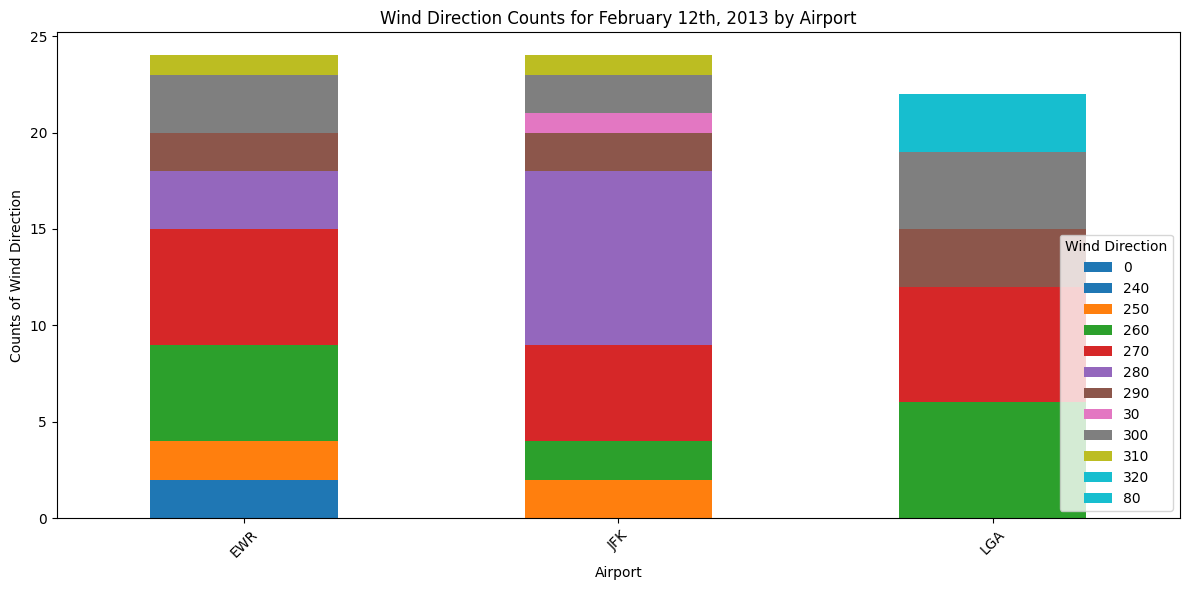

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# List of column names
column_names = ['origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp', 'humid',
                'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
                'time_hour']

# Load the CSV file with specified column names
file_path = 'nycflights13/data-raw/weather.csv'  # Ensure correct path
df = pd.read_csv(file_path, names=column_names)

# Convert 'time_hour' to datetime format
df['time_hour'] = pd.to_datetime(df['time_hour'], errors='coerce')

# Check for parsing issues
if df['time_hour'].isnull().any():
    print("Warning: Some dates could not be parsed correctly.")

# Filter the dataset for February 12th, 2013
df_filtered = df[(df['time_hour'].dt.year == 2013) & (df['time_hour'].dt.month == 2) & (df['time_hour'].dt.day == 12)]

# Check if there are any entries for this date
if df_filtered.empty:
    print("No data available for February 12th, 2013.")
else:
    # Group by airport and wind direction, counting occurrences
    wind_dir_counts = df_filtered.groupby(['origin', 'wind_dir']).size().unstack(fill_value=0)

    # Plotting
    plt.figure(figsize=(12, 6))
    wind_dir_counts.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())

    # Formatting the plot
    plt.title('Wind Direction Counts for February 12th, 2013 by Airport')
    plt.xlabel('Airport')
    plt.ylabel('Counts of Wind Direction')
    plt.xticks(rotation=45)
    plt.legend(title='Wind Direction')
    plt.tight_layout()  # Adjust layout to fit everything
    plt.show()

 <h4> To remove all variables relating to the New Jersey Newark Liberty International Airport from the above chart, I needed to filter out all references to Newark's wind data, such as its variables and specific data manipulations. Below is a modified version of the script that excludes anything related to Newark Liberty International Airport, focusing only on LaGuardia and JFK Airports. Also, I replaced the bar chart with a scatter
 plot for clarity.<h4>

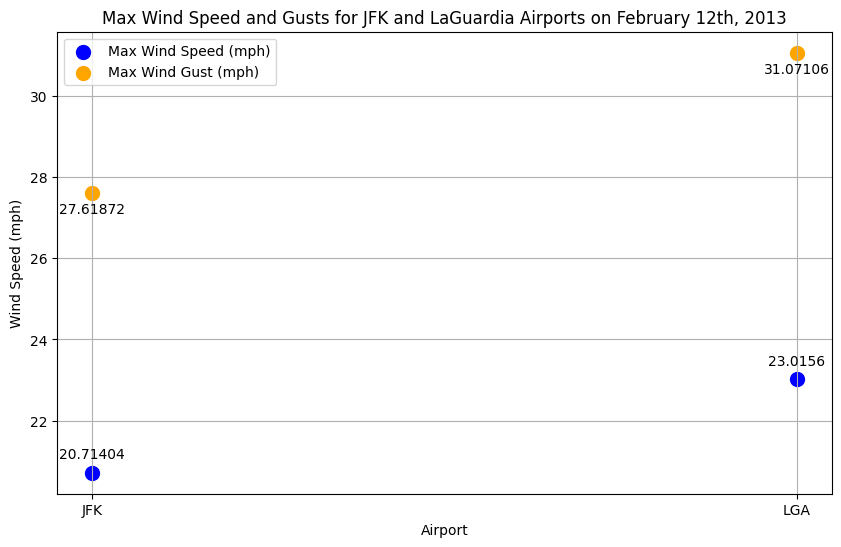

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'nycflights13/data-raw/weather.csv'  # Update file path
df = pd.read_csv(file_path)

# Parse the 'time_hour' column as datetime
df['time_hour'] = pd.to_datetime(df['time_hour'], errors='coerce')

# Filter for February 12th, 2013 and relevant airports (excluding Newark)
df_filtered = df[(df['time_hour'].dt.date == pd.to_datetime('2013-02-12').date()) &
                  (df['origin'].isin(['JFK', 'LGA']))]  # Filter out Newark

# Check if we have any data after filtering
if df_filtered.empty:
    print("No data available for February 12th, 2013 for JFK and LaGuardia Airports.")
else:
    # Filter out unrealistic wind speeds (e.g., over 100 mph)
    max_expected_speed = 100  # Example threshold
    df_filtered = df_filtered[(df_filtered['wind_speed'] <= max_expected_speed) & 
                              (df_filtered['wind_gust'] <= max_expected_speed)]

    # Check if we have any data after filtering
    if df_filtered.empty:
        print("No valid wind data available for JFK and LaGuardia Airports.")
    else:
        # Prepare data for plotting
        wind_data = df_filtered.groupby('origin').agg(
            Max_Wind_Speed=('wind_speed', 'max'),
            Max_Wind_Gust=('wind_gust', 'max')
        ).reset_index()

        # Plotting a scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(wind_data['origin'], wind_data['Max_Wind_Speed'], color='blue', label='Max Wind Speed (mph)', s=100)
        plt.scatter(wind_data['origin'], wind_data['Max_Wind_Gust'], color='orange', label='Max Wind Gust (mph)', s=100)

        # Add text annotations for each point
        for i, row in wind_data.iterrows():
            plt.annotate(f"{row['Max_Wind_Speed']}", (row['origin'], row['Max_Wind_Speed']), 
                         textcoords="offset points", xytext=(0,10), ha='center')
            plt.annotate(f"{row['Max_Wind_Gust']}", (row['origin'], row['Max_Wind_Gust']), 
                         textcoords="offset points", xytext=(0,-15), ha='center')

        # Formatting the plot
        plt.title('Max Wind Speed and Gusts for JFK and LaGuardia Airports on February 12th, 2013')
        plt.xlabel('Airport')
        plt.ylabel('Wind Speed (mph)')
        plt.legend()
        plt.grid(True)
        plt.show()

In [96]:
import pandas as pd

# Load your dataset into a DataFrame (adjust the file path as needed)
df = pd.read_csv('nycflights13/data-raw/weather.csv')

# Convert 'time_hour' to datetime format
df['time_hour'] = pd.to_datetime(df['time_hour'], errors='coerce')

# Filter the dataset for February 12, 2013, and JFK and LaGuardia airports
specific_date = '2013-02-12'
df_filtered = df[(df['time_hour'].dt.date == pd.to_datetime(specific_date).date()) & 
                 (df['origin'].isin(['JFK', 'LGA']))]

# Calculate the maximum wind speed and wind gust for each airport on that date
windiest_airports = df_filtered.groupby('origin')[['wind_speed', 'wind_gust']].max().reset_index()

# Print the results
print(f"The windiest airports (JFK and LaGuardia) on {specific_date} based on maximum wind speed and gust:")
print(windiest_airports)

# Compare wind speeds between JFK and LaGuardia
jfk_wind_speed = windiest_airports.loc[windiest_airports['origin'] == 'JFK', 'wind_speed'].values[0]
lga_wind_speed = windiest_airports.loc[windiest_airports['origin'] == 'LGA', 'wind_speed'].values[0]

jfk_wind_gust = windiest_airports.loc[windiest_airports['origin'] == 'JFK', 'wind_gust'].values[0]
lga_wind_gust = windiest_airports.loc[windiest_airports['origin'] == 'LGA', 'wind_gust'].values[0]

# Output the comparison results
if jfk_wind_speed > lga_wind_speed:
    print(f"JFK was the windiest airport with a maximum wind speed of {jfk_wind_speed} mph.")
elif lga_wind_speed > jfk_wind_speed:
    print(f"LaGuardia (LGA) was the windiest airport with a maximum wind speed of {lga_wind_speed} mph.")
else:
    print(f"Both JFK and LaGuardia had the same maximum wind speed of {jfk_wind_speed} mph.")

if jfk_wind_gust > lga_wind_gust:
    print(f"JFK had the strongest wind gust at {jfk_wind_gust} mph.")
elif lga_wind_gust > jfk_wind_gust:
    print(f"LaGuardia (LGA) had the strongest wind gust at {lga_wind_gust} mph.")
else:
    print(f"Both JFK and LaGuardia had the same maximum wind gust of {jfk_wind_gust} mph.")


The windiest airports (JFK and LaGuardia) based on maximum wind speed and gust:
  origin  wind_speed  wind_gust
0    JFK    42.57886   66.74524
1    LGA    40.27730   62.14212
JFK was the windiest airport with a maximum wind speed of 42.57886 mph.
JFK had the strongest wind gust at 66.74524 mph.
